# Make nice tables describing cohorts
Author: Caroline Kikawa, heavily referencing [https://towardsdatascience.com/simple-little-tables-with-matplotlib-9780ef5d0bc4](https://towardsdatascience.com/simple-little-tables-with-matplotlib-9780ef5d0bc4)

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Color scheme
palette = [
    '#345995', #blue
    '#03cea4', #teal
    '#ca1551', #red
    '#eac435', #yellow
               ]

resultsdir = '../results'

Define cohort data:

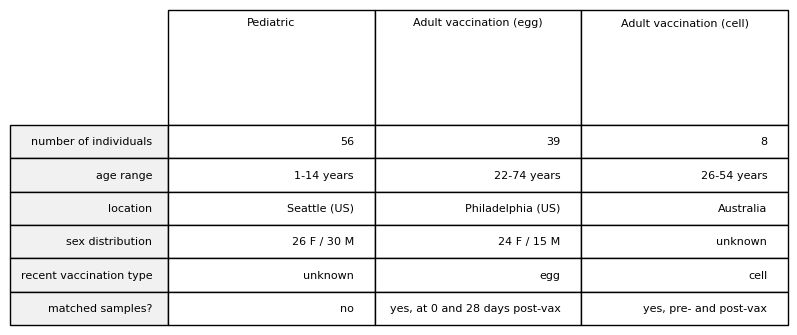

In [60]:
data =  [
            ['Pediatric\n\n\n\n\n\n\n\n', 'Adult vaccination (egg)\n\n\n\n\n\n\n\n', 'Adult vaccination (cell)\n\n\n\n\n\n\n\n'],
            [ 'number of individuals', 56, 39, 8],
            ['age range',  '1-14 years', '22-74 years',   '26-54 years',],
            ['location',  'Seattle (US)',  'Philadelphia (US)',  'Australia'],
            ['sex distribution', '26 F / 30 M', '24 F / 15 M',  'unknown'],
            ['recent vaccination type',  'unknown',  'egg',  'cell'],
            ['matched samples?', 'no', 'yes, at 0 and 28 days post-vax',  'yes, pre- and post-vax'],
        ]

fig_background_color = 'white'
fig_border = 'white'

# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]

# Table data needs to be non-numeric text. Format the data
# while I'm at it.
cell_text = []
for row in data:
    cell_text.append(row)

# Get some lists of color specs for row and column headers
rcolors = plt.cm.Greys(np.full(len(row_headers), 0.12))

colcolours = np.empty_like(data, dtype='object')
for i, cl in enumerate(column_headers):
    # if cl > 50:
    colcolours[:,i] = palette[0]

# Create the figure. Setting a small pad on tight_layout
# seems to better regulate white space. Sometimes experimenting
# with an explicit figsize here can produce better outcome.
plt.figure(linewidth=2,
           edgecolor=fig_border,
           facecolor=fig_background_color,
           # tight_layout={'pad':1},
           figsize=(8,3)
          )
# Add a table at the bottom of the axes
_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')

# Scaling is the only influence we have over top and bottom cell padding.
# Make the rows taller (i.e., make cell y scale larger).
_table.scale(1, 2)

# Make top row extra tall
for r in range(0, len(column_headers)):
    cell = _table[0, r]
    cell.set_height(0.5)
    cell.set_text_props(va = 'center_baseline')

# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Hide axes border
plt.box(on=None)

# Force the figure to update, so backends center objects correctly within the figure.
# Without plt.draw() here, the title will center on the axes and not the figure.
plt.draw()
# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
fig.savefig(os.path.join(resultsdir, 'pretty_cohort_table.png'),
            bbox_inches='tight',
            edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor(),
            dpi=600
            )

## Quickly count up males and females and calculate age range in each cohort

In [55]:
Penn_metadata = pd.read_csv('../../../data/sera_metadata/metadata_PennVaccineCohort.csv')
SCH_metadata = pd.read_csv('../../../data/sera_metadata/metadata_SCH.csv')
Aus_metadata = pd.read_csv('../../../data/sera_metadata/metadata_AusVaccineCohort.csv')

In [40]:
# Get sex information
cohorts = [
    Penn_metadata,
    SCH_metadata,
    # Aus_metadata # This cohort doesn't have metadata for sex
]

male_keys = ['M', 'male']
female_keys = ['F', 'female']

for cohort in cohorts:
    
    males = cohort[cohort['sex'].isin(male_keys)]
    females = cohort[cohort['sex'].isin(female_keys)]

    if 'participant_ID' in cohort.columns:
        if 'PENN' in cohort.participant_ID[0]:
            males = males.participant_ID
            females = females.participant_ID

    else:
        males = males.serum
        females = females.serum
    
    print('there are', len(males), 'males and', len(females), 'females in cohort', males[0].split('_')[0])

there are 15 males and 24 females in cohort PENN23
there are 30 males and 26 females in cohort SCH23


In [58]:
# Get age information
cohorts = [
    Penn_metadata,
    SCH_metadata,
    Aus_metadata 
]



for cohort in cohorts:

    if 'year_of_birth' not in cohort.columns:
        cohort = cohort[['participant_ID', 'age']].drop_duplicates()
        ages = cohort.age

    else:
        year_of_birth = cohort.year_of_birth
        ages = 2023-year_of_birth

    print('for', len(ages), 'individuals in cohort', cohort.iloc[1][0].split('_')[0], 'there are ages from', min(ages), max(ages))


for 39 individuals in cohort PENN23 there are ages from 22 74
for 56 individuals in cohort SCH23 there are ages from 1 14
for 8 individuals in cohort AUS24 there are ages from 26 54


/tmp/ipykernel_33634/251496256.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('for', len(ages), 'individuals in cohort', cohort.iloc[1][0].split('_')[0], 'there are ages from', min(ages), max(ages))
/tmp/ipykernel_33634/251496256.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('for', len(ages), 'individuals in cohort', cohort.iloc[1][0].split('_')[0], 'there are ages from', min(ages), max(ages))
/tmp/ipykernel_33634/251496256.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data